In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
rcParams['figure.figsize'] = 15,6

In [3]:
# Import the file: "norway_new_car_sales_by_make.csv"
df_make = pd.read_csv("norway_new_car_sales_by_make.csv")

In [18]:
# Import the file: "norway_new_car_sales_by_model.csv"
df_model = pd.read_csv("norway_new_car_sales_by_model.csv",encoding='ANSI')

In [19]:
# Import the file: "norway_new_car_sales_by_month.csv"
df_month = pd.read_csv("norway_new_car_sales_by_month.csv")

In [55]:
df_make.head(1)

,Year,Month,Make,Quantity,Pct
0,2007,1,Toyota,2884,22.7


In [50]:
df_model.head(1)

,Year,Month,Make,Model,Quantity,Pct
0,2007,1,Volkswagen,Volkswagen Passat,1267,10.0


In [49]:
df_month.head(1)

,Year,Month,Quantity,Quantity_YoY,Import,Import_YoY,Used,Used_YoY,Avg_CO2,Bensin_Co2,Diesel_Co2,Quantity_Diesel,Diesel_Share,Diesel_Share_LY,Quantity_Hybrid,Quantity_Electric,Import_Electric
0,2007,1,12685,5227,2276,257,NaN,NaN,152,155,152,10072,79.4,52.5,NaN,NaN,NaN


## PART A – DATA EXPLORATION – 30%:

#### 1. Print year-wise total car sales and visualize the output (Hint: use bar chart for Year vs. total car sales).

In [62]:
# make a copy of df_make
df_make_Years = df_make.copy(deep=True)

In [58]:
# Groupby Year
df_make_Years = df_make_Years.groupby("Year").sum()

In [59]:
df_make_Years.head(1)

,Month,Quantity,Pct
Year,,,
2007,3003,129195,1198.5


In [60]:
# Remove unecessary information:
df_make_Years.drop(["Month", "Pct"], axis=1, inplace=True)

In [61]:
# Show Total car sales year-wise:
df_make_Years

,Quantity
Year,
2007,129195
2008,110617
2009,98675
2010,127754
2011,138345
2012,137967
2013,142151
2014,144202
2015,150686


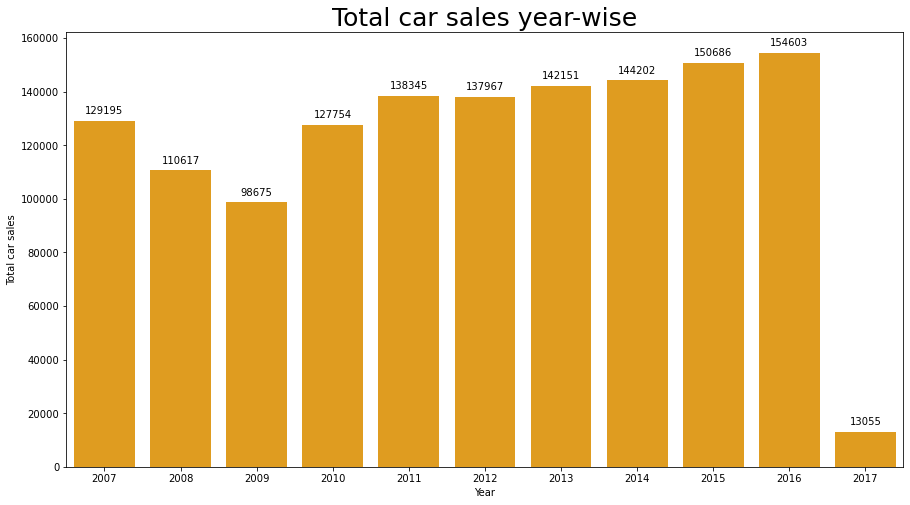

In [47]:
# Visualize
# Set the figure size
plt.figure(figsize = (15,8))

# plot a bar chart
ax = sns.barplot(
    y= "Quantity", 
    x=df_make_Years.index, 
    data= df_make_Years, 
    estimator=sum, 
    ci=None, 
    color='orange');

ax.set_title('Total car sales year-wise', fontsize=25)
ax.set_ylabel('Total car sales')


for p in ax.patches:                 
    ax.annotate(np.round(p.get_height(),decimals=2),(p.get_x()+p.get_width()/2., p.get_height()),ha='center',va='center',xytext=(0, 10),textcoords='offset points')



#### 2. Print monthly total car sales and visualize for a specific year. 

In [74]:
df2 = df_make.copy(deep=True)

In [75]:
df2.head()

,Year,Month,Make,Quantity,Pct
0,2007,1,Toyota,2884,22.7
1,2007,1,Volkswagen,2521,19.9
2,2007,1,Peugeot,1029,8.1
3,2007,1,Ford,870,6.9
4,2007,1,Volvo,693,5.5


In [85]:
df2 = df2.groupby(['Year','Month']).sum()

In [91]:
# Remove unecessary information:
df2.drop(["Pct"], axis=1, inplace=True)

In [110]:
# Print Monthly sales each year
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(df2)

            Quantity
Year Month          
2007 1         12685
     2          9793
     3         11264
     4          8854
     5         12007
     6         11083
     7         12062
     8         10786
     9          9340
     10        11646
     11        10453
     12         9222
2008 1          9901
     2         10567
     3          9506
     4         11704
     5         10217
     6          9670
     7          9605
     8          7833
     9          8453
     10         8390
     11         6952
     12         7819
2009 1          5353
     2          6287
     3          7601
     4          7504
     5          7421
     6          7581
     7          9394
     8          7967
     9          9530
     10        10187
     11         9600
     12        10250
2010 1          9697
     2          9094
     3         11486
     4         10677
     5          9896
     6         11119
     7         11507
     8         10414
     9         11137
     10      

In [94]:
df_2 = df2.head(12)

In [97]:
df_2 = df_2.reset_index()

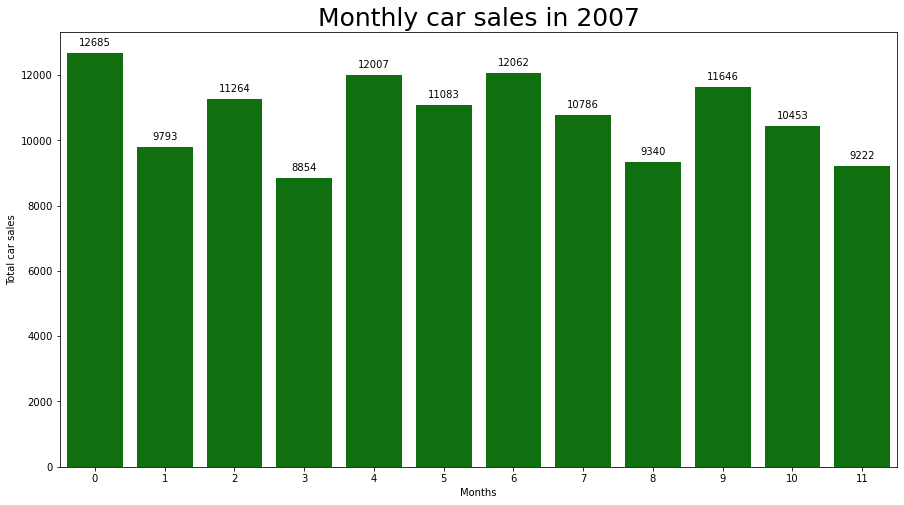

In [105]:
# Visualize monthly sales for year 2007:

# Set the figure size
plt.figure(figsize = (15,8))

# plot a bar chart
ax = sns.barplot(
    y= "Quantity", 
    x=df_2.index, 
    data= df_2, 
    estimator=sum, 
    ci=None, 
    color='green');

ax.set_title('Monthly car sales in 2007', fontsize=25)
ax.set_ylabel('Total car sales')
ax.set_xlabel('Months')


for p in ax.patches:                 
    ax.annotate(np.round(p.get_height(),decimals=2),(p.get_x()+p.get_width()/2., p.get_height()),ha='center',va='center',xytext=(0, 10),textcoords='offset points')



#### 3. Print monthly total car sales from 2007 to 2017 and visualize them to represent the month numbers (1 for Jan 2 for Feb) and total car sales value. (Hint: Use bar chart). Also, find the month for number of highest and lowest car sales

In [4]:
df3 = df_make.copy(deep=True)

In [5]:
df3 = df3[["Year","Month","Quantity"]]

In [6]:
df3

,Year,Month,Quantity
0,2007,1,2884
1,2007,1,2521
2,2007,1,1029
3,2007,1,870
4,2007,1,693
...,...,...,...
4372,2017,1,3
4373,2017,1,2
4374,2017,1,1
4375,2017,1,1


In [7]:
df3_1 = df3.pivot_table(index='Month', columns='Year', values=['Quantity'], aggfunc='sum')

In [8]:
df3_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 1 to 12
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (Quantity, 2007)  12 non-null     float64
 1   (Quantity, 2008)  12 non-null     float64
 2   (Quantity, 2009)  12 non-null     float64
 3   (Quantity, 2010)  12 non-null     float64
 4   (Quantity, 2011)  12 non-null     float64
 5   (Quantity, 2012)  12 non-null     float64
 6   (Quantity, 2013)  12 non-null     float64
 7   (Quantity, 2014)  12 non-null     float64
 8   (Quantity, 2015)  12 non-null     float64
 9   (Quantity, 2016)  12 non-null     float64
 10  (Quantity, 2017)  1 non-null      float64
dtypes: float64(11)
memory usage: 1.1 KB


In [9]:
df3_1

Quantity                                                                 \
Year      2007     2008     2009     2010     2011     2012     2013     2014   
Month                                                                           
1      12685.0   9901.0   5353.0   9697.0  10372.0  10838.0  11639.0  11385.0   
2       9793.0  10567.0   6287.0   9094.0  10543.0  10925.0  11322.0  11246.0   
3      11264.0   9506.0   7601.0  11486.0  12901.0  13051.0  10735.0  13861.0   
4       8854.0  11704.0   7504.0  10677.0  11330.0  10876.0  13988.0  12115.0   
5      12007.0  10217.0   7421.0   9896.0  13005.0  12612.0  12012.0  12337.0   
6      11083.0   9670.0   7581.0  11119.0  10354.0  11053.0  10948.0  11441.0   
7      12062.0   9605.0   9394.0  11507.0  11189.0  11920.0  11312.0  11690.0   
8      10786.0   7833.0   7967.0  10414.0  11464.0  11790.0  11660.0  11444.0   
9       9340.0   8453.0   9530.0  11137.0  11737.0  11134.0  12168.0  11585.0   
10     11646.0   8390.0  10187.0  10683.0  11543.0  12413.0  12893.0  12963.0   
11     10453.0   6952.0   9600.0  11908.0  12357.0  11986.0  12079.0  11486.0   
12      9222.0   7819.0  10250.0  10136.0  11550.0   9369.0  11395.0  12649.0   

                                  
Year      2015     2016     2017  
Month                             
1      10523.0  10991.0  13055.0  
2      10685.0  12222.0      NaN  
3      14159.0  13875.0      NaN  
4      12782.0  14116.0      NaN  
5      12036.0  12864.0      NaN  
6      14207.0  13681.0      NaN  
7      12394.0  11040.0      NaN  
8      12604.0  13232.0      NaN  
9      12421.0  13854.0      NaN  
10     13197.0  11932.0      NaN  
11     12600.0  13194.0      NaN  
12     13078.0  13602.0      NaN

In [17]:
# Getting the highest car sales in a month
df3_1.max().max()

14207.0

In [12]:
# Getting the lowest car sales in a month
df3_1.min().min()

5353.0

array([[<AxesSubplot:xlabel='Month'>, <AxesSubplot:xlabel='Month'>,
        <AxesSubplot:xlabel='Month'>, <AxesSubplot:xlabel='Month'>],
       [<AxesSubplot:xlabel='Month'>, <AxesSubplot:xlabel='Month'>,
        <AxesSubplot:xlabel='Month'>, <AxesSubplot:xlabel='Month'>],
       [<AxesSubplot:xlabel='Month'>, <AxesSubplot:xlabel='Month'>,
        <AxesSubplot:xlabel='Month'>, <AxesSubplot:xlabel='Month'>]],
      dtype=object)

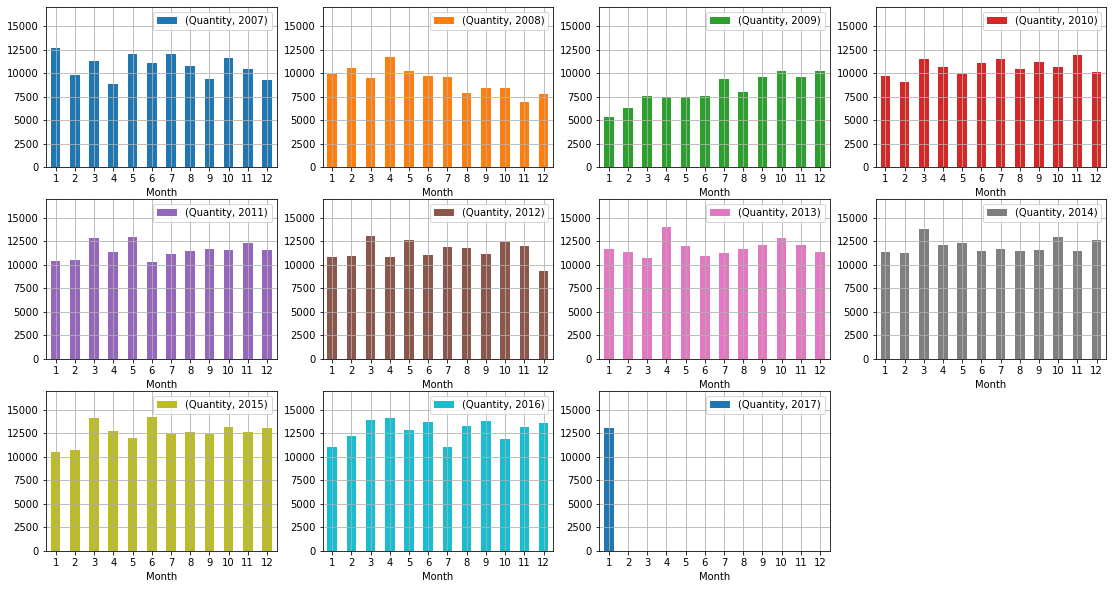

In [110]:
df3_1.plot(kind='bar', subplots=True, title=['', '','', '','', '','', '', '','', ''],rot=0, sharex=False, figsize=(19, 10), layout=(3,4), ylim=(0,17000), grid = True)

#### 4. Calculate the total amount of the sales for each manufacturer from 2007 to 2017. Find the top 10 manufacturers based on the total sale and visualize the output. (Hint: Sort make-wise total car sales and visualize them using bar chart).

In [182]:
df4 = df_make.copy(deep = True)

In [206]:
#Calculate total amount of the sales for each manufacturer from 2007 to 2017. Find the top-10 manufacturers based on the total sale.
make_total = df4.pivot_table("Quantity",index=['Make'],aggfunc='sum')
top_10_manufacturers = make_total.sort_values(by='Quantity',ascending=False)[:10]
print('The top-10 manufacturers based on the total sale:')
top_10_manufacturers

The top-10 manufacturers based on the total sale:


,Quantity
Make,
Volkswagen,206669
Toyota,168177
Volvo,99937
Ford,99713
BMW,73315
Audi,70475
Skoda,66007
Nissan,64535
Peugeot,61033


In [197]:
top_10_manufacturers.columns

Index(['Quantity'], dtype='object')

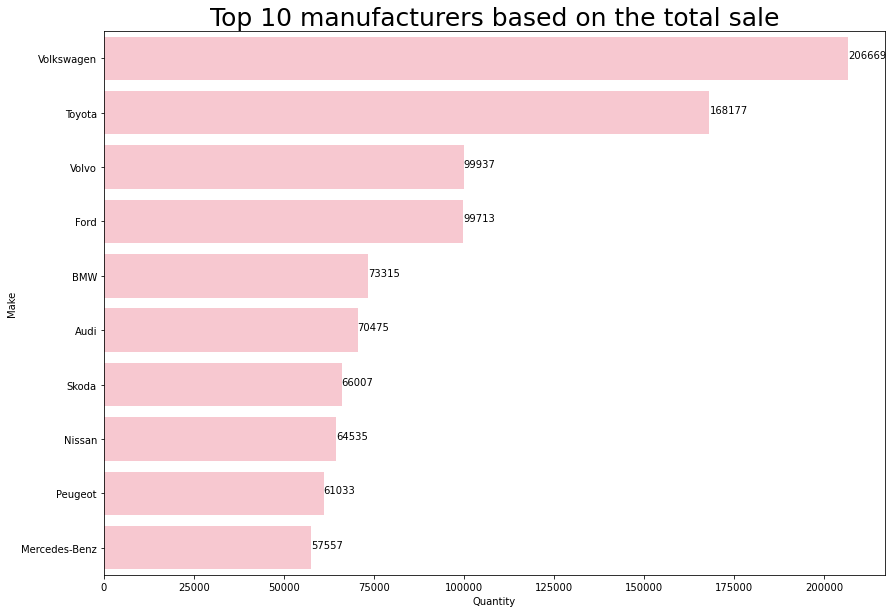

In [204]:
# Visualize Top 10 manufacturers based on the total sale
# Set the figure size
plt.figure(figsize=(14, 10))

# plot a bar chart
ax1 = sns.barplot(
    y= top_10_manufacturers.index, 
    x= top_10_manufacturers.Quantity, 
    data= top_10_manufacturers, 
    estimator=sum, 
    ci=None, 
    color='pink');



ax1.set_title('Top 10 manufacturers based on the total sale', fontsize=25)
plt.ticklabel_format(style='plain', axis='x')

# Add values next to the bars
for index, value in enumerate(top_10_manufacturers["Quantity"]):
    plt.text(value, index,
             str(value))


#### 6. Draw pie chart for the sales of all the models of “Toyota” in year 2012. 

In [305]:
df6 = df_model.copy(deep = True)

In [307]:
df6['Make'].unique()

array(['Volkswagen ', 'Toyota ', 'Peugeot ', 'Skoda ', 'Ford ', 'Volvo ',
       'Audi ', 'Opel ', 'BMW ', 'Honda ', 'Saab ', 'Mitsubishi ',
       'Nissan ', 'Mazda ', 'Subaru ', 'Hyundai ', 'Suzuki ', 'Kia ',
       'Mercedes-Benz ', 'Citroen ', '\xa0Mercedes-Benz ', 'Tesla ',
       'Renault '], dtype=object)

In [310]:
# Droping Unecessary Rows and Columns:
df6.drop(df6[(df6['Make'] != 'Toyota ') | (df6['Year'] != 2012)].index, inplace=True)
df6.drop(["Month", "Pct"], axis=1, inplace=True)

In [330]:
df6["Model"].unique()

array(['Toyota Yaris', 'Toyota Avensis', 'Toyota Auris', 'Toyota RAV4',
       'Toyota Prius'], dtype=object)

In [331]:
# Unite the duplicate names: 'Toyota Rav4' and 'Toyota RAV4'
df6['Model'] = df6['Model'].replace({'Toyota Rav4': 'Toyota RAV4'})

In [336]:
#the most selling car make with pie chart visualization
Models = df6.groupby(['Model']).sum().index
Amount = df6.groupby(['Model']).sum()['Quantity']

In [337]:
Models

Index(['Toyota Auris', 'Toyota Avensis', 'Toyota Prius', 'Toyota RAV4',
       'Toyota Yaris'],
      dtype='object', name='Model')

In [338]:
Amount.sort()

Model
Toyota Auris      2555
Toyota Avensis    3726
Toyota Prius      1286
Toyota RAV4       1135
Toyota Yaris      3715
Name: Quantity, dtype: int64

The sales of all the models of “Toyota” in year 2012: 


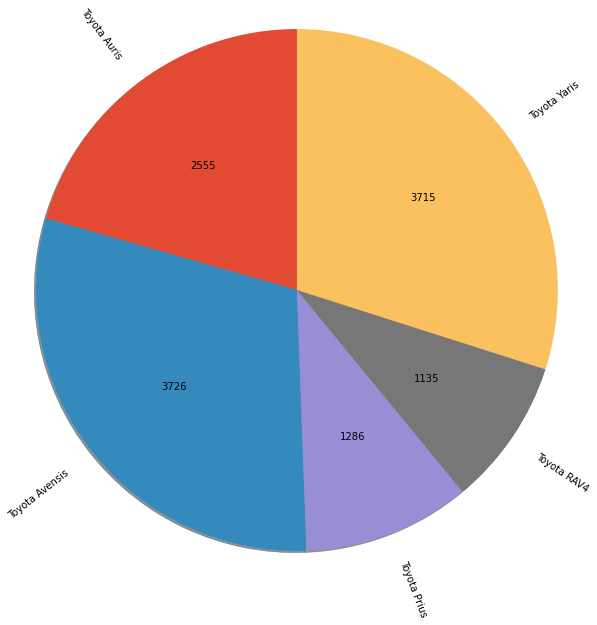

In [340]:
# define Seaborn color palette to use
palette_color = sns.color_palette('bright')
  
# plotting data on chart
plt.pie(x= Amount, labels = Models, radius=3, autopct= lambda x: '{:.0f}'.format(x*sizes.sum()/100), shadow=True, startangle=90, rotatelabels=True)
  
# displaying chart
print("The sales of all the models of “Toyota” in year 2012: ")
plt.show()

#### 11. Plot the sales of new cars and sales of the diesel cars to see the comparison. Similarly, plot the sales of new car and electric cars. (Hint: Use line chart).

In [8]:
df11 = df_month.copy(deep=True)

In [9]:
df11 = df11[["Year","Quantity", "Diesel_Share","Quantity_Electric"]]

In [11]:
df11_1 = df11.groupby(["Year"]).sum()

In [12]:
df11_1

,Quantity,Diesel_Share,Quantity_Electric
Year,,,
2007,129195,890.6,0.0
2008,110617,867.6,0.0
2009,98675,866.9,0.0
2010,127754,898.5,0.0
2011,138345,906.6,1996.0
2012,137967,772.7,3950.0
2013,142151,635.2,7882.0
2014,144202,585.4,18094.0
2015,150686,491.9,25788.0


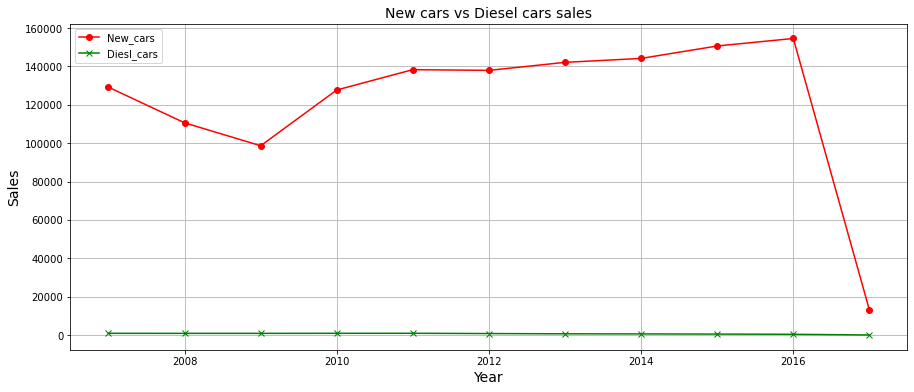

In [ ]:
# Plot New cars vs Diesel cars sales:
plt.plot(df11_1.index, df11_1['Quantity'], color='red', marker='o')
plt.plot(df11_1.index, df11_1['Diesel_Share'], color='green', marker='x')


plt.title('New cars vs Diesel cars sales', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.legend(['New_cars', 'Diesl_cars','Electric_cars'], loc=2)
plt.ylabel('Sales', fontsize=14)
plt.grid(True)

plt.show()

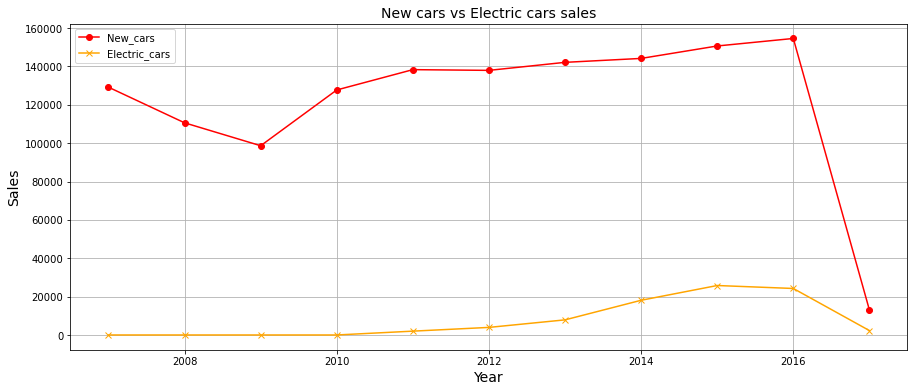

In [41]:
# Plot New cars vs Electric cars sales:
plt.plot(df11_1.index, df11_1['Quantity'], color='red', marker='o')
plt.plot(df11_1.index, df11_1['Quantity_Electric'], color='orange', marker='x')

plt.title('New cars vs Electric cars sales', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.legend(['New_cars', 'Electric_cars'], loc=2)
plt.ylabel('Sales', fontsize=14)
plt.grid(True)

plt.show()

#### 12. Calculate year-wise share of diesel car sales in total sales. 

In [5]:
df12 = df_month.copy(deep = True)

In [7]:
df12 = df12[["Year","Diesel_Share"]]

In [8]:
# Grouping by Year:
df12_1 = df12.groupby(["Year"]).sum()

In [10]:
# Calculating year-wise share of diesel car sales in total sales.
df12_1['Diesel_Share'] = df12_1['Diesel_Share'].apply(lambda x: x/12)

In [13]:
print("Year-wise share of diesel car sales in total sales:")
df12_1

Year-wise share of diesel car sales in total sales:


,Diesel_Share
Year,
2007,74.216667
2008,72.300000
2009,72.241667
2010,74.875000
2011,75.550000
2012,64.391667
2013,52.933333
2014,48.783333
2015,40.991667


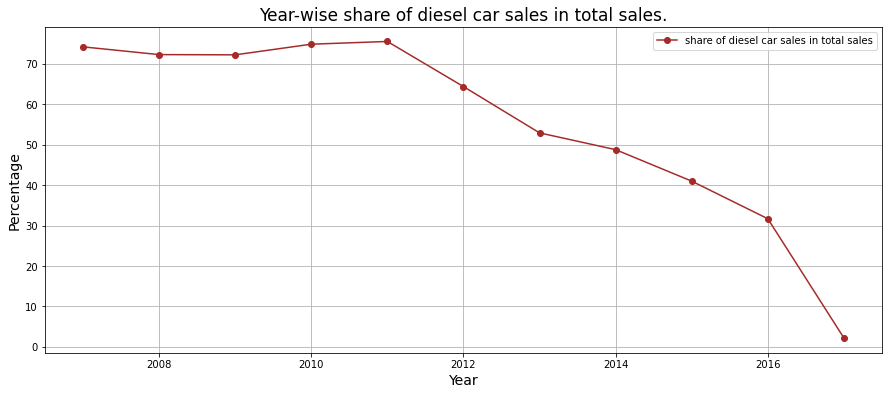

In [20]:
# Visualize Year-wise share of diesel car sales in total sales.
plt.plot(df12_1.index, df12_1['Diesel_Share'], color='brown', marker='o')

plt.title('Year-wise share of diesel car sales in total sales.', fontsize=17)
plt.xlabel('Year', fontsize=14)
plt.legend(['share of diesel car sales in total sales'], loc=1)
plt.ylabel('Percentage', fontsize=14)
plt.grid(True)

plt.show()

#### 13. Compare year-wise average consumption of CO2 emission of all cars sold with year-wise average consumption of CO2 emission in benzene-fueled cars sold and diesel-fueled cars sold

In [21]:
df13 = df_month.copy(deep=True)

In [22]:
df13 = df13[["Year","Avg_CO2","Bensin_Co2","Diesel_Co2"]]

In [23]:
# Calculating year-wise new and used (import) car sales:
df13_1 = df13.groupby(["Year"]).sum()

In [24]:
df13_1

,Avg_CO2,Bensin_Co2,Diesel_Co2
Year,,,
2007,1908,1930,1902
2008,1896,1911,1905
2009,1811,1776,1829
2010,1688,1664,1706
2011,1608,1575,1642
2012,1559,1550,1640
2013,1476,1486,1623
2014,1325,1434,1601
2015,1197,1420,1580


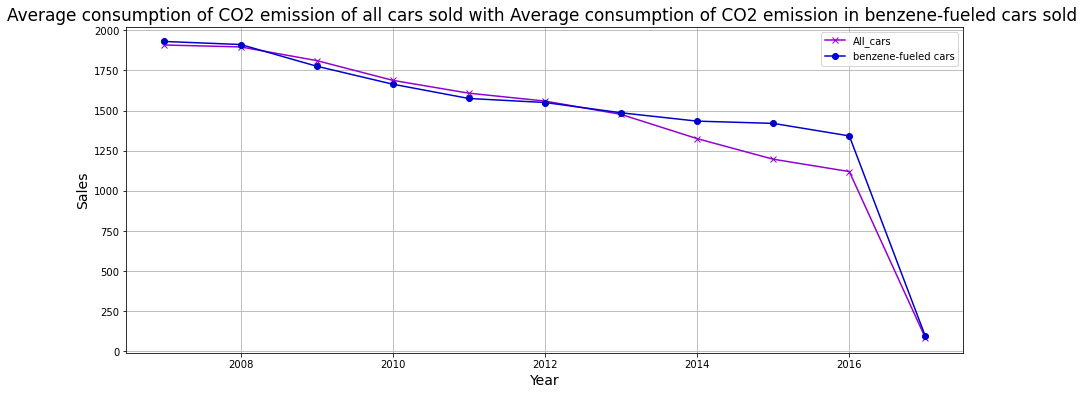

In [25]:
# Visualize year-wise Average consumption of CO2 emission of all cars sold with Average consumption of CO2 emission in benzene-fueled cars sold:
plt.plot(df13_1.index, df13_1['Avg_CO2'], color='darkviolet', marker='x')
plt.plot(df13_1.index, df13_1['Bensin_Co2'], color='mediumblue', marker='o')



plt.title('Average consumption of CO2 emission of all cars sold with Average consumption of CO2 emission in benzene-fueled cars sold ', fontsize=17)
plt.xlabel('Year', fontsize=14)
plt.legend(['All_cars', 'benzene-fueled cars'], loc=1)
plt.ylabel('Sales', fontsize=14)
plt.grid(True)

plt.show()

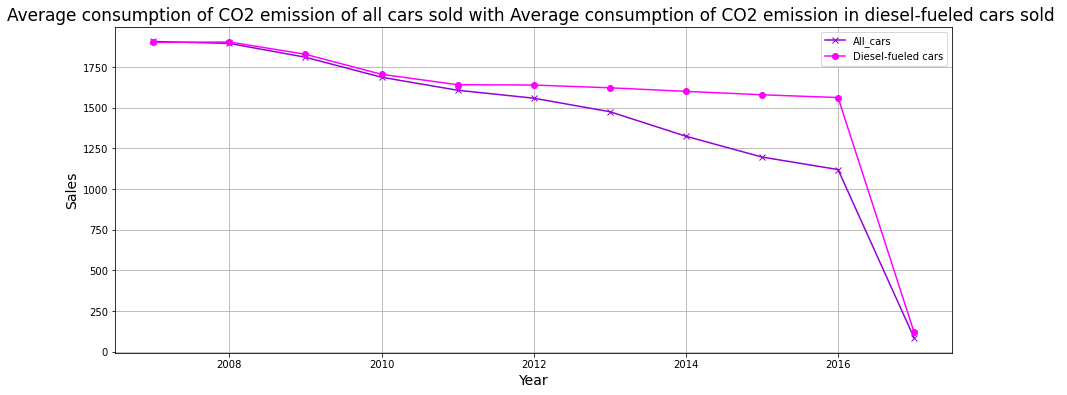

In [26]:
# Visualize Average consumption of CO2 emission of all cars sold with Average consumption of CO2 emission in diesel-fueled cars sold
plt.plot(df13_1.index, df13_1['Avg_CO2'], color='darkviolet', marker='x')
plt.plot(df13_1.index, df13_1['Diesel_Co2'], color='magenta', marker='o')



plt.title('Average consumption of CO2 emission of all cars sold with Average consumption of CO2 emission in diesel-fueled cars sold ', fontsize=17)
plt.xlabel('Year', fontsize=14)
plt.legend(['All_cars', 'Diesel-fueled cars'], loc=1)
plt.ylabel('Sales', fontsize=14)
plt.grid(True)

plt.show()

#### 14. Calculate and visualize year-wise new and used (import) car sales to compare the statistics. 

In [27]:
df14 = df_month.copy(deep = True)

In [28]:
df14 = df14[["Year","Quantity", "Import"]]

In [29]:
# Calculating year-wise new and used (import) car sales:
df14_1 = df14.groupby(["Year"]).sum()

In [30]:
df14_1

,Quantity,Import
Year,,
2007,129195,33356
2008,110617,27218
2009,98675,24823
2010,127754,29014
2011,138345,27069
2012,137967,30556
2013,142151,30312
2014,144202,24757
2015,150686,21756


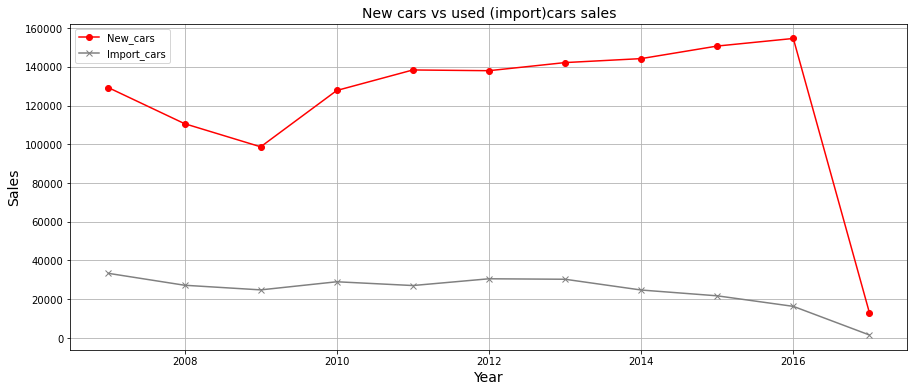

In [32]:
# Visualize year-wise new and used (import) car sales:
plt.plot(df14_1.index, df14_1['Quantity'], color='red', marker='o')
plt.plot(df14_1.index, df14_1['Import'], color='grey', marker='x')


plt.title('New cars vs used (import)cars sales', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.legend(['New_cars', 'Import_cars'], loc=2)
plt.ylabel('Sales', fontsize=14)
plt.grid(True)

plt.show()

#### 15. Calculate and visualize year-wise sales of all used (import) car and sales of Electric-used cars (import_electric) to make a comparison.

In [34]:
df15 = df_month.copy(deep=True)

In [36]:
df15 = df15[["Year","Import","Import_Electric"]]

In [37]:
# Calculating year-wise new and used (import) car sales:
df15_1 = df15.groupby(["Year"]).sum()

In [38]:
df15_1

,Import,Import_Electric
Year,,
2007,33356,0.0
2008,27218,0.0
2009,24823,0.0
2010,29014,0.0
2011,27069,0.0
2012,30556,211.0
2013,30312,2096.0
2014,24757,3063.0
2015,21756,5122.0


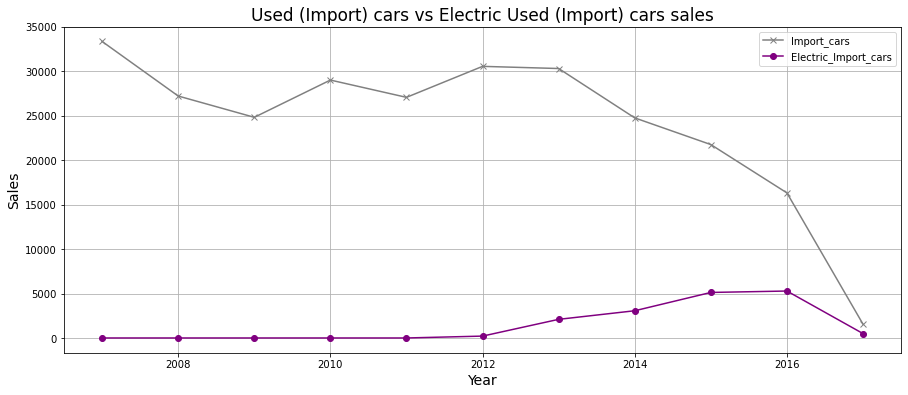

In [39]:
# Visualize year-wise used (import) and Electric-used cars (import_electric) car sales:
plt.plot(df15_1.index, df15_1['Import'], color='grey', marker='x')
plt.plot(df15_1.index, df15_1['Import_Electric'], color='purple', marker='o')

plt.title('Used (Import) cars vs Electric Used (Import) cars sales', fontsize=17)
plt.xlabel('Year', fontsize=14)
plt.legend(['Import_cars', 'Electric_Import_cars'], loc=1)
plt.ylabel('Sales', fontsize=14)
plt.grid(True)

plt.show()

In [384]:
df7 = df_model.copy(deep= True)

In [385]:
df7

,Year,Month,Make,Model,Quantity,Pct
0,2007,1,Volkswagen,Volkswagen Passat,1267,10.0
1,2007,1,Toyota,Toyota Rav4,819,6.5
2,2007,1,Toyota,Toyota Avensis,787,6.2
3,2007,1,Volkswagen,Volkswagen Golf,720,5.7
4,2007,1,Toyota,Toyota Corolla,691,5.4
...,...,...,...,...,...,...
2689,2017,1,Peugeot,Peugeot 3008,216,1.7
2690,2017,1,Kia,Kia Niro,214,1.6
2691,2017,1,Skoda,Skoda Superb,205,1.6
2692,2017,1,BMW,BMW 2-serie,202,1.5


In [386]:
# Droping Unecessary Rows and Columns:
df7.drop(df7[(df7['Year'] != 2015)].index, inplace=True)

In [387]:
df7

,Year,Month,Make,Model,Quantity,Pct
2018,2015,1,Volkswagen,Volkswagen Golf,1313,12.5
2019,2015,1,Volkswagen,Volkswagen Golf,1199,11.2
2020,2015,1,Toyota,Toyota Rav4,535,5.1
2021,2015,1,Toyota,Toyota Yaris,328,3.1
2022,2015,1,Mitsubishi,Mitsubishi Outlander,326,3.1
...,...,...,...,...,...,...
2292,2015,12,Mercedes-Benz,Mercedes-Benz B-klasse,159,1.2
2293,2015,12,Volkswagen,Volkswagen up!,146,1.1
2294,2015,12,Nissan,Nissan Qashqai,119,0.9
2295,2015,12,Toyota,Toyota Rav4,74,0.6


In [388]:
df7.drop(["Year","Month", "Pct"], axis=1, inplace=True)

In [389]:
df7

,Make,Model,Quantity
2018,Volkswagen,Volkswagen Golf,1313
2019,Volkswagen,Volkswagen Golf,1199
2020,Toyota,Toyota Rav4,535
2021,Toyota,Toyota Yaris,328
2022,Mitsubishi,Mitsubishi Outlander,326
...,...,...,...
2292,Mercedes-Benz,Mercedes-Benz B-klasse,159
2293,Volkswagen,Volkswagen up!,146
2294,Nissan,Nissan Qashqai,119
2295,Toyota,Toyota Rav4,74


In [381]:
df7.sort_values([('Quantity')], ascending=False)

,Make,Model,Quantity
2157,Volkswagen,Volkswagen Golf,1626
2097,Volkswagen,Volkswagen Golf,1595
2177,Volkswagen,Volkswagen Golf,1542
2257,Volkswagen,Volkswagen Golf,1435
2058,Volkswagen,Volkswagen Golf,1421
...,...,...,...
2134,Ford,Ford S-Max,29
2135,Toyota,Toyota Avensis,25
2196,Renault,Renault Zoe,24
2136,BMW,BMW X5,23


In [390]:
df7_2 = df7.groupby(["Make","Model"]).sum()

In [392]:
df7_2

Quantity
Make           Model                           
Audi           Audi A3                     2776
BMW            BMW 2-serie                   48
               BMW 3-serie                  245
               BMW X1                        80
               BMW X3                       316
               BMW X5                        52
               BMW i3                      1511
Ford           Ford Fiesta                  217
               Ford Focus                  2012
               Ford Kuga                    471
               Ford Mondeo                 2549
               Ford S-Max                    90
Hyundai        Hyundai i20                  399
Kia            Kia Sportage                 278
Mazda          Mazda CX-5                  3168
Mercedes-Benz  Mercedes-Benz B-klasse      1313
               Mercedes-Benz C-klasse      1061
               Mercedes-Benz E-klasse        48
Mitsubishi     Mitsubishi Outlander        3955
Nissan         Nissan Leaf                 3189
               Nissan Qashqai              2808
               Nissan X-Trail               279
Opel           Opel Astra                    61
Peugeot        Peugeot 308                 1485
Renault        Renault Zoe                  837
Skoda          Skoda Octavia               4280
               Skoda Superb                 116
Suzuki         Suzuki SX4                   542
               Suzuki Vitara                118
Tesla          Tesla Model S               3968
Toyota         Toyota Auris                4890
               Toyota Avensis               123
               Toyota Prius                 171
               Toyota Rav4                 3755
               Toyota Yaris                4214
Volkswagen     Volkswagen Golf            16388
               Volkswagen Passat           3207
               Volkswagen Polo              322
               Volkswagen Tiguan            118
               Volkswagen up!              2039
Volvo          Volvo V40                    400
               Volvo V60                    449
               Volvo V70                   2611
               Volvo XC60                  1988

In [373]:
df7_2 = df7_2.sort_values([('Quantity')], ascending=False)

In [376]:
df7_2 = df7_2.groupby(["Make","Model"])

In [405]:
df7_2

Quantity
Make           Model                           
Audi           Audi A3                     2776
BMW            BMW 2-serie                   48
               BMW 3-serie                  245
               BMW X1                        80
               BMW X3                       316
               BMW X5                        52
               BMW i3                      1511
Ford           Ford Fiesta                  217
               Ford Focus                  2012
               Ford Kuga                    471
               Ford Mondeo                 2549
               Ford S-Max                    90
Hyundai        Hyundai i20                  399
Kia            Kia Sportage                 278
Mazda          Mazda CX-5                  3168
Mercedes-Benz  Mercedes-Benz B-klasse      1313
               Mercedes-Benz C-klasse      1061
               Mercedes-Benz E-klasse        48
Mitsubishi     Mitsubishi Outlander        3955
Nissan         Nissan Leaf                 3189
               Nissan Qashqai              2808
               Nissan X-Trail               279
Opel           Opel Astra                    61
Peugeot        Peugeot 308                 1485
Renault        Renault Zoe                  837
Skoda          Skoda Octavia               4280
               Skoda Superb                 116
Suzuki         Suzuki SX4                   542
               Suzuki Vitara                118
Tesla          Tesla Model S               3968
Toyota         Toyota Auris                4890
               Toyota Avensis               123
               Toyota Prius                 171
               Toyota Rav4                 3755
               Toyota Yaris                4214
Volkswagen     Volkswagen Golf            16388
               Volkswagen Passat           3207
               Volkswagen Polo              322
               Volkswagen Tiguan            118
               Volkswagen up!              2039
Volvo          Volvo V40                    400
               Volvo V60                    449
               Volvo V70                   2611
               Volvo XC60                  1988

In [414]:
df7_2.sort_index(level=0)

Quantity
Make           Model                           
Audi           Audi A3                     2776
BMW            BMW 2-serie                   48
               BMW 3-serie                  245
               BMW X1                        80
               BMW X3                       316
               BMW X5                        52
               BMW i3                      1511
Ford           Ford Fiesta                  217
               Ford Focus                  2012
               Ford Kuga                    471
               Ford Mondeo                 2549
               Ford S-Max                    90
Hyundai        Hyundai i20                  399
Kia            Kia Sportage                 278
Mazda          Mazda CX-5                  3168
Mercedes-Benz  Mercedes-Benz B-klasse      1313
               Mercedes-Benz C-klasse      1061
               Mercedes-Benz E-klasse        48
Mitsubishi     Mitsubishi Outlander        3955
Nissan         Nissan Leaf                 3189
               Nissan Qashqai              2808
               Nissan X-Trail               279
Opel           Opel Astra                    61
Peugeot        Peugeot 308                 1485
Renault        Renault Zoe                  837
Skoda          Skoda Octavia               4280
               Skoda Superb                 116
Suzuki         Suzuki SX4                   542
               Suzuki Vitara                118
Tesla          Tesla Model S               3968
Toyota         Toyota Auris                4890
               Toyota Avensis               123
               Toyota Prius                 171
               Toyota Rav4                 3755
               Toyota Yaris                4214
Volkswagen     Volkswagen Golf            16388
               Volkswagen Passat           3207
               Volkswagen Polo              322
               Volkswagen Tiguan            118
               Volkswagen up!              2039
Volvo          Volvo V40                    400
               Volvo V60                    449
               Volvo V70                   2611
               Volvo XC60                  1988

In [440]:
print(df7_2.loc[('Make', 'city2'), 1])

KeyError: 1

In [441]:
Vol = df7_2.loc['Volvo ']

In [444]:
Vol.sort_values([('Quantity')], ascending=False)

,Quantity
Model,
Volvo V70,2611
Volvo XC60,1988
Volvo V60,449
Volvo V40,400


In [445]:
Vol.

Index(['Quantity'], dtype='object')

In [428]:
df7_2

Quantity
Make           Model                           
Audi           Audi A3                     2776
BMW            BMW 2-serie                   48
               BMW 3-serie                  245
               BMW X1                        80
               BMW X3                       316
               BMW X5                        52
               BMW i3                      1511
Ford           Ford Fiesta                  217
               Ford Focus                  2012
               Ford Kuga                    471
               Ford Mondeo                 2549
               Ford S-Max                    90
Hyundai        Hyundai i20                  399
Kia            Kia Sportage                 278
Mazda          Mazda CX-5                  3168
Mercedes-Benz  Mercedes-Benz B-klasse      1313
               Mercedes-Benz C-klasse      1061
               Mercedes-Benz E-klasse        48
Mitsubishi     Mitsubishi Outlander        3955
Nissan         Nissan Leaf                 3189
               Nissan Qashqai              2808
               Nissan X-Trail               279
Opel           Opel Astra                    61
Peugeot        Peugeot 308                 1485
Renault        Renault Zoe                  837
Skoda          Skoda Octavia               4280
               Skoda Superb                 116
Suzuki         Suzuki SX4                   542
               Suzuki Vitara                118
Tesla          Tesla Model S               3968
Toyota         Toyota Auris                4890
               Toyota Avensis               123
               Toyota Prius                 171
               Toyota Rav4                 3755
               Toyota Yaris                4214
Volkswagen     Volkswagen Golf            16388
               Volkswagen Passat           3207
               Volkswagen Polo              322
               Volkswagen Tiguan            118
               Volkswagen up!              2039
Volvo          Volvo V40                    400
               Volvo V60                    449
               Volvo V70                   2611
               Volvo XC60                  1988

In [425]:
for idx0, data in df7_2.groupby(level=["Model"]):
            
            print(idx0)
            print(data.max())
            print('----')

Audi A3
Quantity    2776
dtype: int64
----
BMW 2-serie
Quantity    48
dtype: int64
----
BMW 3-serie
Quantity    245
dtype: int64
----
BMW X1
Quantity    80
dtype: int64
----
BMW X3
Quantity    316
dtype: int64
----
BMW X5
Quantity    52
dtype: int64
----
BMW i3
Quantity    1511
dtype: int64
----
Ford Fiesta
Quantity    217
dtype: int64
----
Ford Focus
Quantity    2012
dtype: int64
----
Ford Kuga
Quantity    471
dtype: int64
----
Ford Mondeo
Quantity    2549
dtype: int64
----
Ford S-Max
Quantity    90
dtype: int64
----
Hyundai i20
Quantity    399
dtype: int64
----
Kia Sportage
Quantity    278
dtype: int64
----
Mazda CX-5
Quantity    3168
dtype: int64
----
Mercedes-Benz B-klasse
Quantity    1313
dtype: int64
----
Mercedes-Benz C-klasse
Quantity    1061
dtype: int64
----
Mercedes-Benz E-klasse
Quantity    48
dtype: int64
----
Mitsubishi Outlander
Quantity    3955
dtype: int64
----
Nissan Leaf
Quantity    3189
dtype: int64
----
Nissan Qashqai
Quantity    2808
dtype: int64
----
Nissan X-Tra